In [ ]:
# Import Libraries
import time

from ImportData2D import get_label, getFilename, get_file_name
from stlSlicer import getSlicer, slicecoor, rotatestl
from imgSave import saveplot
import numpy as np

np.random.seed(125)


In [ ]:
label = getLabel("Occ_Sum", "median", True, False,False)
print(type(label[0]))
label = getLabel("Occ_Sum", "median", True, True,False)
print(type(label[0][0]))

In [ ]:
import os
test_name = "prep_test.tfrecords"
test_name = os.path.join("data", test_name)
print(test_name)

In [ ]:
import os
A = './data/preparation_181_data_test_eval_address.txt'
print(os.path.abspath(A))
print(os.path.isfile(A))

In [ ]:
example_grouped_address = ['/home/pasin/Documents/Google_Drive/Aa_TIT_LAB_Comp/Library/Tooth/Tooth/Model/my2DCNN/data/cross_section/PreparationScan_0_84140','/home/pasin/Documents/Google_Drive/Aa_TIT_LAB_Comp/Library/Tooth/Tooth/Model/my2DCNN/data/cross_section/PreparationScan_1_95138_0','/home/pasin/Documents/Google_Drive/Aa_TIT_LAB_Comp/Library/Tooth/Tooth/Model/my2DCNN/data/cross_section/PreparationScan_1_304138_45']
grouped_address = [1,2,3]
# define an empty list
train_address = []

# open file and read the content in a list
with open(A, 'r') as filehandle:  
    for line in filehandle:
        # remove linebreak which is the last character of the string
        current_name = line[:-1]
        # print(current_name)
        for i, name in enumerate(example_grouped_address):
            
            if current_name in name:
                train_address.append(grouped_address[i])
                grouped_address.remove(grouped_address[i])
                example_grouped_address.remove(example_grouped_address[i])
                

In [ ]:
print(train_address)

In [ ]:
import ast
B = ast.literal_eval(error_file_names[0])
print(B[0])

In [ ]:
train_address = ['abc_0_0','abc_0_90','abc_0_45','abc_0_135','abc_1_0','abc_1_45','abc_1_90','abc_1_70']

In [ ]:
train_address.sort()
print([s for s in train_address if 'abc_0' in s])

In [ ]:
import tensorflow as tf
import csv
A = {'learning_rate':0.00009123,'keep_prob':0.25, 'activation':tf.nn.relu, 'channels':[16,16,32]}
# A = {'a':'b','c':'d'}

with open("output"+".csv", "w") as csvfile:
    writer = csv.writer(csvfile)
    for key, val in A.items():
        writer.writerow([key, val])


In [ ]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# You can add the parameter data_home to wherever to where you want to download your data
import tensorflow as tf
import numpy as np
((train_data, train_labels),(eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()
train_data = train_data / np.float32(255)
train_data = train_data.reshape(train_data.shape[0], -1)
print(train_data.shape)
train_labels = train_labels.astype(np.int32)  # not required
print(train_labels.shape)
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    train_data, train_labels, test_size=1/7.0, random_state=0)
print(train_img.shape)

In [ ]:
csvData = [(-0.53103447, [1e-05, 0.0, '1', 1]), (-0.53103447, [4.315202424267864e-05, 0.0, '1', 1]), (-0.53103447, [6.388961292348475e-05, 0.04720173848853115, '1', 4]), (-0.53103447, [0.0001540877645803547, 0.35419707255064065, '1', 1])]
newData = []
for i in csvData:
    data = {'value': i[0],
           'learning_rate': i[1][0],
           'dropout_rate': i[1][1],
           'activation': i[1][1],
           'channels': i[1][1],}
    newData.append(data)
print(type(csvData))
print((csvData))
#print(type(csvData[0]))
# print((csvData[0]))


with open('person.csv', 'w') as csvFile:
    writer = csv.DictWriter(csvFile, fieldnames = ['value','learning_rate','dropout_rate', 'activation', 'channels'])
    writer.writeheader()
    writer.writerows(newData)



In [ ]:
print("Func vals: %s \n" % search_result.func_vals)
print("Hyper para: %s \n" % search_result.x_iters)
print("Combined: %s" % list(zip(search_result.func_vals, search_result.x_iters)))

In [ ]:
searched_parameter_2 = (list(zip(search_result.func_vals, search_result.x_iters)))
i = searched_parameter_2[0]
data_2 = {field_name[0]: i[0] * -1,
                field_name[1]: i[1][0],
                field_name[2]: i[1][1],
                field_name[3]: i[1][1],
                field_name[4]: i[1][1]}
print(data_2)

In [ ]:
stl_points = points
new_stl_points = []
for stl_point_sample in stl_points:  # stl_point_sample is one example of stl_points
    new_points_sample = []
    for stl_point_image in stl_point_sample:  # stl_point_image is one degree of cross-section
        difference = stl_point_image[1:, :] - stl_point_image[0:-1, :]  # Find difference between each position
        new_points_sample.append(difference)
    new_stl_points.append(new_points_sample)

In [ ]:
print(type(new_stl_points))
print(len(new_stl_points))
print(type(new_stl_points[0]))
print(len(new_stl_points[0]))
print(type(new_stl_points[0][0]))
print(np.shape(new_stl_points[0][0]))

In [ ]:
print(lbl_name)
print(err_name)

In [ ]:
import os
# File name will be [tfrecord_name]_train_Taper_sum_median
tfrecord_file_name = "preparation_181_data"
# tfrecord_name = "original_preparation_data"
# csv_name = "../global_data/Ground Truth Score_50.csv"
# Directory of image
dataset_folder_dir = "./data/cross_section"
 
file_name = './data/preparation_181_data_train_address.txt'
name = []
if os.path.isfile(file_name):  # Check if file exist
    with open(file_name) as f:
        name = f.read().splitlines()
    '''
    with open(file_name, 'r') as filehandle:
        for line in filehandle:
            name.append(line)
            
            # remove linebreak which is the last character of the string
            # current_name = line[:-1]
            
            # check if it exist in grouped exist, if found, put in train_address
            for i, name in enumerate(example_grouped_address):
                if current_name in name:
                    train_address.append(grouped_address[i])
                    grouped_address.remove(grouped_address[i])
                    example_grouped_address.remove(example_grouped_address[i])
                    break
            '''
    # print("Use %s examples from previous tfrecords as training" % len(train_address))
else:
    print("Not found")

In [ ]:
print(type(name))
for n in name[1:]:
    print(n)

In [ ]:
print (n[1] == '/home/pasin/Documents/Google_Drive/Aa_TIT_LAB_Comp/Library/Tooth/Tooth/Model/my2DCNN/data/cross_section/PreparationScan_1_85148')

In [ ]:
def readjust_median_label(label, avg_data):
    possible_value = [1,3,5]
    for i, label_value in enumerate(label):
        if not (label_value in possible_value):
            # Check if value is over/under boundary, if so, choose the min/max value
            if label_value < possible_value[0]:
                label[i] = possible_value[0]
            elif label_value > possible_value[-1]:
                label[i] = possible_value[-1]
            else:
                if label_value > avg_data[i]:  # If median is more than average, round up
                    label[i] = min(filter(lambda x: x > label_value, possible_value))
                else:  # If median is less or equal to average, around down
                    label[i] = max(filter(lambda x: x < label_value, possible_value))
    return label

A = [1,3,5,2,2,4,4, 10, -2, 2]
B = [1,4,2,3,1,4,7, 15]

C = readjust_median_label(A,B)
print(C)

In [ ]:
import numpy as np
data = np.load('/home/pasin/Documents/Google_Drive/Aa_TIT_LAB_Comp/Library/Tooth/Tooth/Model/my2DCNN/data/coordinates/PreparationScan_1_305139_0.npy')
print(type(data))
print(data)

In [ ]:
import csv
def read_file(csv_dir, header = False):
    header_name = []
    data = []
    with open(csv_dir) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            print(row)
            if header:
                header_name.append(row)
                header = False
            else:
                data.append(row)
    if not header_name:
        return data
    else:
        return data, header_name

In [ ]:
data, header = read_file(file_name[-2], True)
print(header)
print("\n")
print(data[-2])
l_data = data[-2][1:]
print([float(l_data[0]), float(l_data[1]),l_data[2],int(l_data[3]),int(l_data[3])])

In [ ]:
import tensorflow as tf
import numpy as np

labels = tf.constant([0,1,2,0])
labels_one_hot = tf.one_hot(labels,3)

weight = tf.constant([[1,2,3]], dtype=tf.float32)
new_w = tf.matmul(labels_one_hot,weight,transpose_b=True)

logits = tf.constant([[0,1,0],[0,1,0],[0,1,0],[1,0,0]], dtype  =tf.float32)

loss = tf.losses.sparse_softmax_cross_entropy(labels, logits, weights = new_w)

sess = tf.Session()

print(sess.run(loss))

In [ ]:
import numpy as np
import tensorflow as tf
def read_npy_file(item):
    print("Item: %s" % item)
    label = item[1]
    image = []
    for i in range(4):
        img = np.load(item[0][i])
        image.append(img.astype(np.float32))
    return (image, label)

A = "/home/pasin/Documents/Link to Tooth/Tooth/Model/my2DCNN/data/coordinate_300_point/"
B = tf.py_function(read_npy_file, [A], [tf.float32, ])

sess = tf.Session()
print(sess.run(B))

In [ ]:
from open_save_file import save_file

field_name = ['accuracy', 'learning_rate', 'dropout_rate', 'activation', 'cnn_channels', 'fc_channels']
save_file('/home/pasin/Documents/Pasin/model/BL_classification/hyperparameters_result_20190424_000.csv', [], field_name = field_name)

In [ ]:
from skopt.space import Real, Categorical, Integer
dim_learning_rate = Real(low=1e-5, high=1e-2, prior='log-uniform', name='learning_rate')
dim_dropout_rate = Real(low=0, high=0.875, name='dropout_rate')
dim_activation = Categorical(categories=['0', '1'],
                             name='activation')
dim_channel = Integer(low=1, high=4, name='channels')
dim_channel_fc = Integer(low=1, high=2, name='fully_connect_channels')  # Fully conencted
dim_loss_weight = Real(low=0.8, high=2, name='loss_weight')
dimensions = [dim_learning_rate,
              dim_dropout_rate,
              dim_activation,
              dim_channel,
              dim_channel_fc,
              dim_loss_weight]

dim_name = [i.name for i in dimensions]
print(dim_name)

In [ ]:
import tensorflow as tf

numdegree = 4

def create_file_reader_ops(filename_queue):
    reader = tf.TextLineReader(skip_header_lines=1)
    _, csv_row = reader.read(filename_queue)
    record_defaults = [[0], [0]]
    x,y = tf.decode_csv(csv_row, record_defaults=record_defaults)
    features = tf.pack([x,y])
    return features


# Import tfrecord to dataset
def deserialize(example):
    feature = {'label': tf.FixedLenFeature([], tf.int64)}
    for i in range(numdegree):
        feature['img' + str(i)] = tf.FixedLenFeature([], tf.string)
    return tf.parse_single_example(example, feature)


def decode(data_dict):
    if numdegree != 4:
        raise Exception('Number of degree specified is not compatible, edit code')
    # Create initial image, then stacking it
    image_decoded = []

    # Stacking the rest
    for i in range(0, numdegree):
        img = data_dict['img' + str(i)]
        file_name = tf.read_file(img)
        filename_queue = tf.train.string_input_producer([file_name])
        example = create_file_reader_ops(filename_queue)
        image_decoded.append(example)
    
    # image_stacked = tf.stack([image_decoded[0], image_decoded[1], image_decoded[2], image_decoded[3]], axis=2)
    # image_stacked = tf.cast(image_stacked, tf.float32)
    label = tf.cast(data_dict['label'], tf.float32)
    # output = (image_stacked, label)
    # return {'images': image_stacked, 'label': label}  # Output is [Channel, Height, Width]
    return image_decoded[0], label# image_stacked, label

data_path = "/home/pasin/Documents/Link to Tooth/Tooth/Model/my2DCNN/data/tfrecord/preparation_coor_debug_BL_median_coor_train.tfrecords"
dataset = tf.data.TFRecordDataset(data_path)
dataset = dataset.map(deserialize, num_parallel_calls=7)
dataset = dataset.map(decode, num_parallel_calls=7)

iterator = dataset.make_one_shot_iterator()
next_image_data = iterator.get_next()
images = []
label = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    try:
        # Keep extracting data till TFRecord is exhausted
        while True:
            data = sess.run(next_image_data)
            images.append(data[0])
            label.append(data[1])
    except tf.errors.OutOfRangeError:
        pass    

In [ ]:
def create_file_reader_ops(filename_queue):
    reader = tf.TextLineReader(skip_header_lines=1)
    _, csv_row = reader.read(filename_queue)
    record_defaults = [[0], [0]]
    x,y = tf.decode_csv(csv_row, record_defaults=record_defaults)
    features = tf.pack([x,y])
    return features
filename_queue = tf.train.string_input_producer(["/home/pasin/Documents/Link to Tooth/Tooth/Model/my2DCNN/data/tfrecord/preparation_coor_debug_BL_median_coor_train.tfrecords"], num_epochs=1, shuffle=False)
example = create_file_reader_ops(filename_queue)
print(example)

In [ ]:
import numpy as np
A = np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])
B = tf.sparse_tensor_to_dense(A,default_value=0)
C= tf.reshape(B,[10])

sess = tf.Session()

print(sess.run(B))
print(sess.run(C))

In [ ]:
import tensorflow as tf
# Read TFRecord file
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(['/home/pasin/Documents/Link to Tooth/Tooth/Model/my2DCNN/data/tfrecord/preparation_coor_smallraw_Taper_Sum_median_coor_train.tfrecords'])

_, serialized_example = reader.read(filename_queue)
numdegree = 4
# Define features
def deserialize(example):
    feature = {'label': tf.FixedLenFeature([], tf.int64)}
    for i in range(numdegree):
        for j in range(2):
            feature['img' + str(i) + str(j)] = tf.FixedLenFeature([], tf.float32)
    return tf.parse_single_example(example, feature)

# Extract features from serialized data
read_data = deserialize(filename_queue)

# Many tf.train functions use tf.train.QueueRunner,
# so we need to start it before we read
tf.train.start_queue_runners(sess)

# Print features
with tf.Session() as sess:
    for name, tensor in sess.run(read_data).items():
        print('{}: {}'.format(name, tensor))

In [ ]:
from get_data import get_data_from_path



p = "/home/pasin/Documents/Link to Tooth/Tooth/Model/my2DCNN/data/tfrecord/preparation_361_MD_median_train.tfrecords"
img = get_data_from_path(p)

In [ ]:
from open_save_file import get_label
import collections
label, label_name = get_label("BL","median",double_data=True,one_hotted=False,normalized=False)

counter=collections.Counter(label)
for k,v in counter.items():
    print(k)
    print(v)
print(counter)

In [ ]:
import tensorflow as tf

weight = tf.constant([[1,2, 1]],dtype=tf.float32)
loss_weight = tf.matmul(one_hot_label,weight,transpose_b=True,a_is_sparse=True)

In [ ]:
import os
csv_dir = "/home/pasin/Documents/Pasin/model/BL_coordinate_dense/hyperparameters_result_20190521_17_42_43.csv"
print(os.path.dirname(csv_dir))

In [ ]:
from coor_get_data import get_data_from_path

image, labels = get_data_from_path('./data/tfrecord/preparation_coor_300/preparation_coor_300_BL_median_train.tfrecords', 1)

In [ ]:
import numpy as np
print(labels)

In [ ]:
import tensorflow as tf
labels = tf.cast(labels, tf.int64)
labels = (labels-1)/2
print(labels)
with tf.Session() as sess:
    print(sess.run(labels))
one_hot_label = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=3)

with tf.Session() as sess:
    print(sess.run(one_hot_label))

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.enable_eager_execution()


def softmax_focal_loss(labels_l, logits_l, gamma=2., alpha=4.):
    """Focal loss for multi-classification
    https://www.dlology.com/blog/multi-class-classification-with-focal-loss-for-imbalanced-datasets/
    FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
    gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
    d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
    Focal Loss for Dense Object Detection
    https://arxiv.org/abs/1708.02002

    Arguments:
        labels_l {tensor} -- ground truth labels_l, shape of [batch_size, num_class] <- One hot vector
        logits_l {tensor} -- model's output, shape of [batch_size, num_class] <- Before softmax

    Keyword Arguments:
        gamma {float} -- (default: {2.0})
        alpha {float} -- (default: {4.0})

    Returns:
        [tensor] -- loss.
    """

    gamma = float(gamma)

    epsilon = 1e-32
    # labels_l = tf.cast(labels_l, tf.float32)
    labels_l = tf.one_hot(indices=tf.cast(labels_l, tf.int32), depth=3)
    logits_l = tf.cast(logits_l, tf.float32)

    # logits_l = tf.nn.softmax(logits_l)
    # print("Softmax: %s" % logits_l)
    logits_l = tf.add(logits_l, epsilon)  # Add epsilon so log is valid
    ce = tf.multiply(labels_l, -tf.log(logits_l))  # Cross entropy, shape of [batch_size, num_class]
    fl_weight = tf.multiply(labels_l, tf.pow(tf.subtract(1., logits_l), gamma))  # This is focal loss part
    fl = tf.multiply(alpha, tf.multiply(fl_weight, ce))  # Add alpha weight here
    reduced_fl = tf.reduce_max(fl, axis=1)
    return tf.reduce_mean(reduced_fl)


# labels = tf.constant([1,5,3])
# logits = tf.constant([[50,0,0],[1,1,2],[90,0,90]],dtype=tf.float32)
x = []
y = []
y2 = []
y3 = []
y4 = []

for i in np.linspace(0, 1, 1001):
    x.append(i)
    labels = tf.constant([1])
    logits = tf.constant([i, 0, 1 - i])
    labels = (labels - 1) / 2
    one_hot_label = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=3)
    labels = tf.cast(labels, tf.int64)

    weight = tf.constant([[1, 1, 1]],
                         dtype=tf.float32)
    loss_weight = tf.linalg.matmul(one_hot_label, weight, transpose_b=True, a_is_sparse=True)

    loss_fc = softmax_focal_loss(labels, logits, gamma=0, alpha=loss_weight)  # labels is int of class, logits is vector
    y.append(loss_fc)

    loss_fc = softmax_focal_loss(labels, logits, gamma=1, alpha=loss_weight)  # labels is int of class, logits is vector
    y2.append(loss_fc)

    loss_fc = softmax_focal_loss(labels, logits, gamma=2, alpha=loss_weight)  # labels is int of class, logits is vector
    y3.append(loss_fc)

    loss_fc = softmax_focal_loss(labels, logits, gamma=5, alpha=loss_weight)  # labels is int of class, logits is vector
    y4.append(loss_fc)
    # loss_ce = tf.losses.sparse_softmax_cross_entropy(labels, logits,
    #                                               weights=loss_weight)  # labels is int of class, logits is vector
    # print("Focal loss:")
    # print(loss_fc)
    # print("Cross entropy")
    # print(loss_ce)
    # print("" )

# with tf.Session() as sess:
#     print(sess.run(loss_fc))
#     print(sess.run(loss_ce))
print("debug")
fig = plt.figure(figsize=(18, 10), dpi=50, facecolor='w', edgecolor='k')
plt.plot(x, y, color='skyblue', label='Cross Entropy')
plt.plot(x, y2, color='olive', label='gamma = 1')
plt.plot(x, y3, color='green', label='gamma = 2')
plt.plot(x, y4, color='red', label='gamma = 5')
#plt.legend(loc=2, prop={'size': 6})
# naming the x axis
plt.xlabel('Probability', fontsize=40)
# plt.xlim(0, 1)
# naming the y axis
plt.ylabel('Loss', fontsize=40)
# plt.ylim(0, 5)
# giving a title to my graph
plt.title('Focal Loss', fontsize=40)
plt.legend()
# function to show the plot
# plt.show()

plt.savefig('focal_loss.png')


In [ ]:
import tensorflow as tf
import numpy as np
import os
from open_save_file import get_input_and_label
from sklearn.model_selection import KFold
numdeg = 4  # Number of images on each example

configs = {'numdeg': numdeg,
           'train_eval_ratio': 0.8,
           'label_data': "Taper_Sum",
           'label_type': "median"
           }


def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


# Run images from pre_processing.py into tfrecords
def serialize_image(example):
    feature = {'label': _int64_feature(example['label'])}
    for i in range(numdeg):
        feature['img' + str(i)] = _bytes_feature(example['img' + str(i)])

    tf_example = tf.train.Example(features=tf.train.Features(feature=feature))
    return tf_example.SerializeToString()


def read_image(file_name, label):
    file_values = {'label': label}
    for i in range(numdeg):
        file_values['img' + str(i)] = tf.read_file(file_name[i])
    return file_values


'''
# Read and load image
def load_image(addr):
    img = cv2.imread(addr, cv2.IMREAD_GRAYSCALE)
    # cv2.imshow('IMAGE WINDOW',img)
    # cv2.waitKey()
    # print(np.shape(img))
    return img
'''


def image_to_tfrecord(tfrecord_name, dataset_folder, csv_dir=None):
    # Create new directory if not created, get all info and zip to tfrecord
    tfrecord_dir = os.path.join("./data/tfrecord", tfrecord_name)
    if not os.path.exists(tfrecord_dir):
        os.makedirs(tfrecord_dir)

    #Get file name from dataset_folder
    grouped_train_address, grouped_eval_address = get_input_and_label(tfrecord_name, dataset_folder, csv_dir, configs)
    # Start writing train dataset
    train_dataset = tf.data.Dataset.from_tensor_slices(grouped_train_address)
    train_dataset = train_dataset.map(read_image)  # Read file address, and get info as string

    it = train_dataset.make_one_shot_iterator()

    elem = it.get_next()



    tfrecord_train_name = os.path.join(tfrecord_dir, "%s_%s_%s_train.tfrecords" % (
        tfrecord_name, configs['label_data'], configs['label_type']))
    tfrecord_eval_name = os.path.join(tfrecord_dir, "%s_%s_%s_eval.tfrecords" % (
        tfrecord_name, configs['label_data'], configs['label_type']))
    # eval_score_name = os.path.join("./data/tfrecord", "%s_%s_%s_score.npy" % (
    #     tfrecord_name, configs['label_data'], configs['label_type']))
    # np.save(eval_score_name, np.asarray(eval_score))

    with tf.Session() as sess:
        writer = tf.python_io.TFRecordWriter(tfrecord_train_name)
        while True:
            try:
                elem_result = serialize_image(sess.run(elem))

                writer.write(elem_result)
            except tf.errors.OutOfRangeError:
                break
        writer.close()

    eval_dataset = tf.data.Dataset.from_tensor_slices(grouped_eval_address)
    eval_dataset = eval_dataset.map(read_image)

    it = eval_dataset.make_one_shot_iterator()

    elem = it.get_next()

    with tf.Session() as sess:
        writer = tf.python_io.TFRecordWriter(tfrecord_eval_name)
        while True:
            try:
                elem_result = serialize_image(sess.run(elem))
                # print(elem_result)
                writer.write(elem_result)
            except tf.errors.OutOfRangeError:
                break
        writer.close()
    print("TFrecords created: %s, %s" % (tfrecord_train_name, tfrecord_eval_name))


# Run images from pre_processing.py into tfrecords
def serialize_coordinate(example):
    feature = {'label': _int64_feature(example['label'])}
    for i in range(numdeg):
        feature['img' + str(i)] = _float_feature(example['img' + str(i)])

    tf_example = tf.train.Example(features=tf.train.Features(feature=feature))
    return tf_example.SerializeToString()


def read_coordinate(file_name, label):
    file_values = {'label': label}
    for i in range(numdeg):
        file_values['img' + str(i)] = (file_name[i]*10000).tostring()
    return file_values




"""
tfrecord_name   : Name of .tfrecord output file
dataset_folder  : Folder of the input data  (Not include label)
csv_dir         : Folder of label data (If not specified, will use the default directory)
"""
# Create new directory if not created, get all info and zip to tfrecord
# tfrecord_dir = os.path.join("./data/tfrecord", tfrecord_name)
# if not os.path.exists(tfrecord_dir):
#     os.makedirs(tfrecord_dir)

# Get data from dataset_folder
grouped_data = []
for i in range(5):
    grouped_data.append([[i*10+0.1,i*10+0.2,i*10+0.3],10*i])
grouped_data = tuple(grouped_data)

# print(grouped_data)
kfold = KFold(5, shuffle = True, random_state = 2)

for train, test in kfold.split(grouped_data):
    train_data = []
    test_data = []
    for train_indice in train:
        train_data.append(grouped_data[train_indice])
    for test_indice in test:
        test_data.append(grouped_data[test_indice])
    print(train_data)
    print(test_data)
    print()


In [ ]:
from pre_processing import get_cross_section

stl_points_all, label_all, label_name_all, error_file_names_all, degree, augment_config = get_cross_section("BL", "median",
                                                                                                            folder_name='/home/pasin/Documents/Link to Tooth/Tooth/Model/global_data/stl_data',
                                                                                                            csv_dir="/home/pasin/Documents/Link to Tooth/Tooth/Model/global_data/Ground Truth Score_new.csv")




In [ ]:
print(len(label_all))
print(len(label_all[0]))
print((error_file_names_all[0]))

Number of mesh: 20896


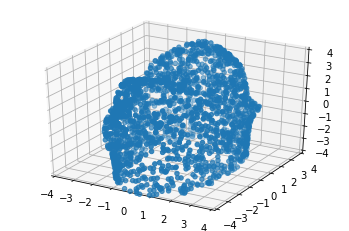

In [22]:
import numpy as np
from stl import mesh
import open3d
import pptk
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def stl_to_point(v1, v2, v3, num_points, sampling_mode="weight"):
    """
    Function to convert stl file into point cloud
    https://medium.com/@daviddelaiglesiacastro/3d-point-cloud-generation-from-3d-triangular-mesh-bbb602ecf238
    :param v1, v2, v3 : (N,3) ndarrays, vi represent x,y,z coordinates of one vertex
    :param num_points: Number of points we want to sample
    :param sampling_mode: String, type of sampling from triangle, recommend "weight"
    :return: points: numpy array of point cloud
    """
    if not(np.shape(v1)[0] ==  np.shape(v2)[0] ==  np.shape(v3)[0]):
        raise ValueError("Size of all three vertex is not the same")
    else:
        print("Number of mesh: %s" % np.shape(v1)[0])
    areas = triangle_area_multi(v1, v2, v3)
    prob = areas / areas.sum()
    if sampling_mode == "weight":
        indices = np.random.choice(range(len(areas)), size=num_points, p=prob)
    else:
        indices = np.random.choice(range(len(areas)), size=num_points)
    points = select_point_from_triangle(v1[indices, :], v2[indices, :], v3[indices, :])
    return points


def triangle_area_multi(v1, v2, v3):
    """
    Find area of triangle, used for finding weights
    :param v1, v2, v3 : (N,3) ndarrays, vi represent x,y,z coordinates of one vertex
    :return: size of triangle
    """
    return 0.5 * np.linalg.norm(np.cross(v2 - v1, v3 - v1), axis=1)


def select_point_from_triangle(v1, v2, v3):
    """
    Select one point from each three vertex
    :param v1, v2, v3 : (N,3) ndarrays, vi represent x,y,z coordinates of one vertex
    :return: ndarrays
    """
    n = np.shape(v1)[0]
    u = np.random.rand(n, 1)
    v = np.random.rand(n, 1)
    is_a_problem = u + v > 1

    u[is_a_problem] = 1 - u[is_a_problem]
    v[is_a_problem] = 1 - v[is_a_problem]

    w = 1 - (u + v)

    points = (v1 * u) + (v2 * v) + (v3 * w)

    return points


if __name__ == "__main__":
    a = mesh.Mesh.from_file(
        "/home/pasin/Documents/Link to Tooth/Tooth/Model/global_data/stl_data/84101-2/PreparationScan.stl")

    # v1 = np.array([[1, 0, 0], [2, 3, 1], [-2, 5, 0]])
    # v2 = np.array([[0, 0, 0], [2, 4, 2], [0, 5, 4]])
    # v3 = np.array([[0, 1, 0], [2, 4, 1], [2, 5, 0]])

    point = stl_to_point(a.v0, a.v1, a.v2, 2000)
    # point = stl_to_point(a.v0, a.v1, a.v2, 2000, sampling_mode=None)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4]) 
    ax.set_zlim([-4,4]) 
    ax.scatter3D(point[:,0], point[:,2], point[:,1], cmap='Greens')